# Code for First Post

Some simple examples to illuminate the content from my post 'A Gentle Introduction to Statistical Learning Theory'.

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy 

# Empirical Risk Minimisers

## Linear Regression

### 2d Example

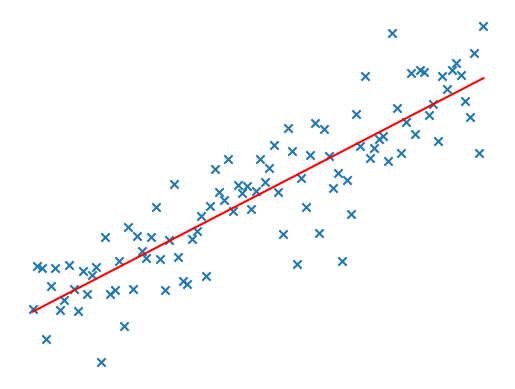

In [22]:
# create linear data with noise
n = 100
xlim = [-1,10]
x = np.linspace(xlim[0],xlim[1],n)
y = 3 * x + 4 + np.random.normal(0,5,n)

# find the ERM
ERM = scipy.stats.linregress(x,y)

# plot
plt.plot(x, ERM.slope * x + ERM.intercept, color = 'red')
plt.scatter(x,y, marker = 'x')
plt.axis('off')
plt.show()

#### 3d Example

[2.5846014 2.5846014]
1.6034254718274674


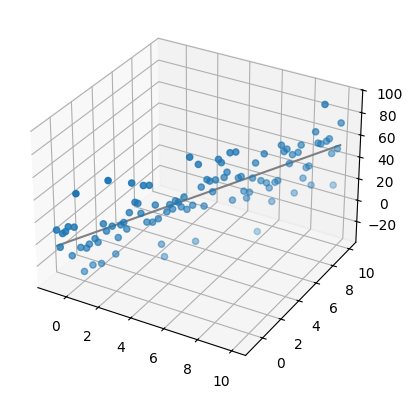

In [23]:
import pandas as pd
from sklearn import linear_model

# more dimensions
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
x = np.linspace(xlim[0],xlim[1],n) 
y = np.linspace(xlim[0],xlim[1],n)
z = 2 * x + 4 * y - 4 + np.random.normal(0,20,n)
ax.scatter3D(x, y, z)

# bundle this data up
X = pd.DataFrame({
    'x': x,
    'y': y
})

regr = linear_model.LinearRegression()
regr.fit(X, z)

print(regr.coef_)
print(regr.intercept_)

# Data for a three-dimensional line
ax.plot3D(x, y, regr.coef_[0] * x + regr.coef_[1] * y + regr.intercept_, 'gray')




## K-NN

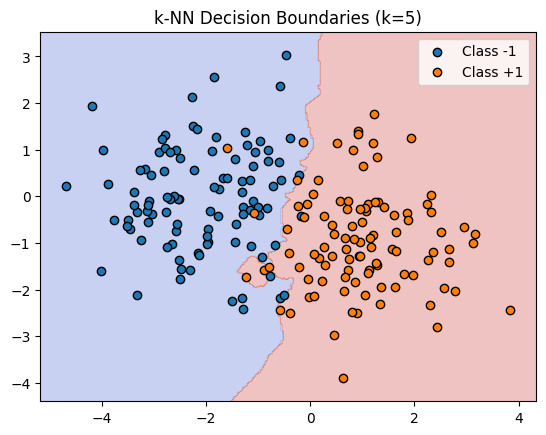

In [38]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

# Class -1
X_neg = np.random.randn(n, 2) - [2,0]
y_neg = -1 * np.ones(n)

# Class +1
X_pos = np.random.randn(n, 2) + [1,-1]
y_pos = 1 * np.ones(n)

# Combine
X = np.vstack((X_neg, X_pos))
y = np.concatenate((y_neg, y_pos))

# 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Create meshgrid over feature space
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict over the grid
Z = knn.predict(grid_points).reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Class -1', edgecolor='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class +1', edgecolor='k')
plt.title(f"k-NN Decision Boundaries (k={k})")
plt.legend()
plt.show()